In [37]:
import pandas as pd
import openpyxl
import os
import tslearn

# Read in the dataset
data = pd.read_csv(os.path.join("..", "data", "Final for clustering.csv"))
kmpl_data = pd.read_csv(os.path.join("..", "data", "Final KMPL dataset.csv"))

In [38]:
data.columns

Index(['Transaction Date', 'REG_NUM', 'Merchant Name', 'No. of Litres',
       'Transaction Amount', 'VEHICLE MAKE', 'MODEL DERIVATIVE', 'DEPARTMENT',
       'RATE CARD CATEGORY', 'Site', 'District', 'Site Lat', 'Site Long',
       'Merchant Lat', 'Merchant Long', 'Fuel Type',
       'Estimated Price Per Litre', 'Coastal Petrol', 'Inland Petrol',
       'Coastal Diesel', 'Inland Diesel', 'Month Name', 'Weekday Name'],
      dtype='object')

In [39]:
# Calculate the average transaction amount for each vehicle category
data['Average_Category_Amount'] = data.groupby(['RATE CARD CATEGORY', 'District', 'Month Name'])['Transaction Amount'].transform('mean')

In [40]:
# Flag transaction amounts that are large for a category
data['Transaction_Amount_Flag'] = data['Transaction Amount'] > data['Average_Category_Amount'] * 1.5

In [41]:
# Check the value counts of the flag
data['Transaction_Amount_Flag'].value_counts()

Transaction_Amount_Flag
False    174280
True       1653
Name: count, dtype: int64

# Flag tranactions where the days between transactions are less than 2

In [42]:
# Convert 'Transaction Date' to datetime
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# Sort data by 'REG_NUM' and 'Transaction Date'
data.sort_values(by=['REG_NUM', 'Transaction Date'], inplace=True)

# Calculate the difference in days between transactions for each vehicle
data['Days_Between_Transactions'] = data.groupby('REG_NUM')['Transaction Date'].diff().dt.days

# Flag transactions that occur too frequently (less than 2 days apart) and the transaction amount is greater than the average transaction amount for that vehicle category
data['Transaction_Frequency_Flag'] = (data['Days_Between_Transactions'] < 2) & (data['Transaction Amount'] > data['Average_Category_Amount'])


In [43]:
# Check the value counts of the flag
data['Transaction_Frequency_Flag'].value_counts()

Transaction_Frequency_Flag
False    149260
True      26673
Name: count, dtype: int64

In [44]:
# Display 10 random rows where the flag is True
data[data['Transaction_Frequency_Flag']].sample(10)

,Transaction Date,REG_NUM,Merchant Name,No. of Litres,Transaction Amount,VEHICLE MAKE,MODEL DERIVATIVE,DEPARTMENT,RATE CARD CATEGORY,Site,...,Coastal Petrol,Inland Petrol,Coastal Diesel,Inland Diesel,Month Name,Weekday Name,Average_Category_Amount,Transaction_Amount_Flag,Days_Between_Transactions,Transaction_Frequency_Flag
56250,2021-07-23,GGG063EC,Skulpspruit Motors,66.92,1097.60,ISUZU,250 D/C HI-RIDE GEN 6,HEALTH,6: LDV 4x2 D/Cab,Empilisweni Hospital *P,...,16.67,17.39,14.4712,15.0862,July,Friday,997.997328,False,0.0,True
17010,2021-05-26,GGA464EC,East Cape Agric Co-Op Somerset East,59.10,913.10,VOLKSWAGEN,VW CRAFTER 50 2.0 TDI XLWB AMBULANCE,EMERGENCY MEDICAL SERVICES,18: Ambulances Large p/van,Humansdorp,...,16.51,17.23,13.8512,14.4662,May,Wednesday,776.882831,False,1.0,True
6594,2021-04-15,GGZ358EC,Maclear Motor & Tractor Maclear,51.25,894.35,NISSAN,NISSAN NV350 2.5 16 SEAT IMPEN,GFMS RENTAL DESK,15: Minibus 14-16 seater,Unknown,...,16.60,17.32,14.1612,14.7762,April,Thursday,818.130195,False,0.0,True
143569,2021-12-15,GGA276EC,Shell Ultra City,71.81,1419.05,ISUZU,D-MAX 250 HO 4X4 REGULAR CAB HI-RIDER,EMERGENCY MEDICAL SERVICES,8: LDV Ambulance,Ss Gida,...,19.57,20.29,17.3098,17.9248,December,Wednesday,1052.448000,False,1.0,True
114275,2021-10-12,GGG577EC,King Service Station,50.05,886.90,VOLKSWAGEN,VW POLO VIVO 1.6 SEDAN,SOCIAL DEVELOPMENT,1: Sedan 1400-1600cc,Unknown,...,17.61,18.33,15.1028,15.7178,October,Tuesday,711.597017,False,0.0,True
111011,2021-10-01,GGF929EC,Ku Bha Service Stati,39.39,712.17,TOYOTA,TOYOTA COROLLA QUEST 1.6,HEALTH,1: Sedan 1400-1600cc,Lilitha Nursing Col - Lusikisiki *P,...,17.62,18.34,14.8748,15.4898,October,Friday,701.481161,False,1.0,True
145455,2021-11-29,GGA468EC,Total Oxford East London,65.70,1264.95,VOLKSWAGEN,VW CRAFTER 50 2.0 TDI XLWB AMBULANCE,EMERGENCY MEDICAL SERVICES,18: Ambulances Large p/van,East London,...,18.82,19.54,16.5848,17.1998,November,Monday,860.824646,False,1.0,True
6792,2021-04-16,GGA323EC,Maclear Motor & Tractor Maclear,60.00,964.80,VOLKSWAGEN,VW CRAFTER PANEL VAN AMBULANCE,EMERGENCY MEDICAL SERVICES,18: Ambulances Large p/van,Unknown,...,16.60,17.32,14.1612,14.7762,April,Friday,865.535769,False,0.0,True
174219,2022-01-19,GGY973EC,Pz Motors & Towing Flagstaff,70.57,1356.35,ISUZU,KB 250C BASE REGULAR CAB,SOCIAL DEVELOPMENT,5: LDV 4x2 1 ton,Unknown,...,18.89,19.61,16.6318,17.2468,January,Wednesday,1076.547636,False,1.0,True
46027,2021-06-10,GGZ487EC,Total Idutywa,44.28,738.59,TOYOTA,TOYOTA COROLLA QUEST 1.6,EDUCATION,1: Sedan 1400-1600cc,Unknown,...,16.41,17.13,14.0512,14.6662,June,Thursday,646.725939,False,1.0,True


In [45]:
data.columns

Index(['Transaction Date', 'REG_NUM', 'Merchant Name', 'No. of Litres',
       'Transaction Amount', 'VEHICLE MAKE', 'MODEL DERIVATIVE', 'DEPARTMENT',
       'RATE CARD CATEGORY', 'Site', 'District', 'Site Lat', 'Site Long',
       'Merchant Lat', 'Merchant Long', 'Fuel Type',
       'Estimated Price Per Litre', 'Coastal Petrol', 'Inland Petrol',
       'Coastal Diesel', 'Inland Diesel', 'Month Name', 'Weekday Name',
       'Average_Category_Amount', 'Transaction_Amount_Flag',
       'Days_Between_Transactions', 'Transaction_Frequency_Flag'],
      dtype='object')

In [46]:
# Function to calculate if the difference exceeds the threshold for each transaction
diesel_actual = [22.75, 23.34, 23.43] # Actual diesel price
gov_price = 20.64 # Government price
mean_diesel = sum(diesel_actual) / 3 # Mean diesel price
diff = mean_diesel - gov_price # Difference between mean diesel price and government price

# Create a new column called Coastal Diesel Adjusted for the difference
data['Coastal Diesel Adjusted'] = data['Coastal Diesel'] + diff

# Create a new column called price difference. If the Fuel Type is Diesel, the price difference is the difference between the Coastal Diesel Adjusted and the Government Price. If the Fuel Type is Petrol, the price difference is the difference between the Coastal Petrol and the Government Price
data['Price Difference'] = data.apply(lambda row: abs(row['Coastal Diesel Adjusted'] - row['Estimated Price Per Litre']) if row['Fuel Type'] == 'Diesel' else abs(row['Coastal Petrol'] - row['Estimated Price Per Litre']), axis=1)

# Create a Fuel Price Flag column that flags transactions where the price difference is greater than R1
data['Fuel_Price_Flag'] = data['Price Difference'] > 1

In [47]:
# Check the value counts of the flag
data['Fuel_Price_Flag'].value_counts()

Fuel_Price_Flag
False    166307
True       9626
Name: count, dtype: int64

In [48]:
# Create a new variable called number of flags that counts the number of flags for each transaction as an integer
data['Number_of_Flags'] = data['Transaction_Amount_Flag'].astype(int) + data['Transaction_Frequency_Flag'].astype(int) + data['Fuel_Price_Flag'].astype(int)

# Convert Number_of_Flags to a categorical variable
data['Number_of_Flags'] = data['Number_of_Flags'].astype('category')

In [49]:
# Check the value counts of the flag
data['Number_of_Flags'].value_counts()

Number_of_Flags
0    140110
1     33707
2      2103
3        13
Name: count, dtype: int64

In [50]:
# Save the data to a new file
data.to_csv('../data/Final Transactions With Flags.csv', index=False)

In [51]:
kmpl_threshold = 5  # Set threshold for KMPL
kmpl_data['KMPL_Flag'] = kmpl_data['KMPL'] < kmpl_threshold

In [52]:
kmpl_data['KMPL_Flag'].value_counts()

KMPL_Flag
False    824
True      78
Name: count, dtype: int64

In [53]:
# Save the KMPL flagged data to a new file
kmpl_data.to_csv('../data/2021 KMPL Flagged.csv', index=False)

# Plots of the flag vs non-flag transactions against different features

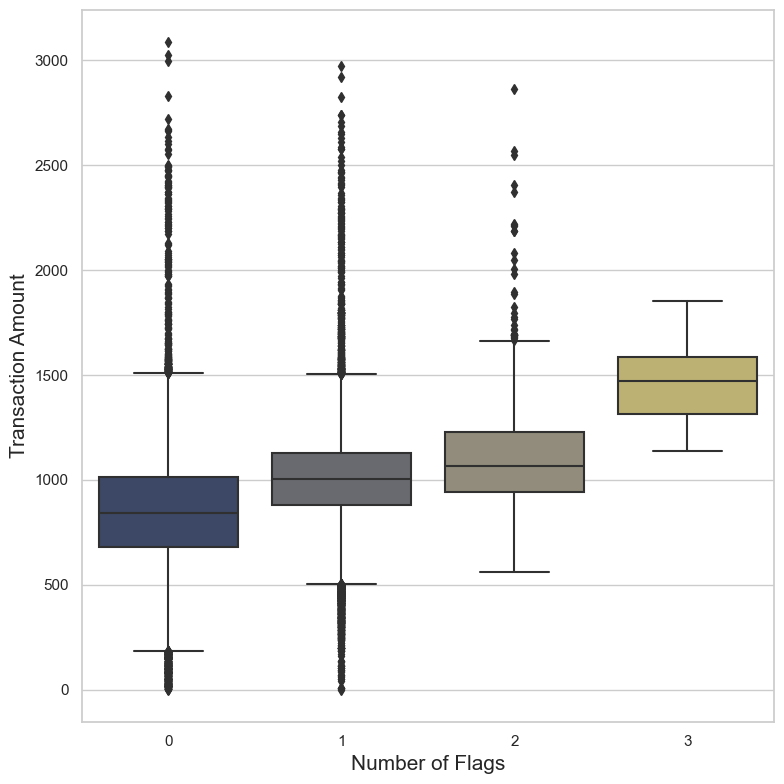

In [59]:
# Plot of flag against transaction amount
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new dataframe called data2 with extreme values removed
data2 = data[data['Transaction Amount'] < 5000]
data2 = data2[data2['Transaction Amount'] > 0]

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 8)) 
sns.boxplot(x='Number_of_Flags', y='Transaction Amount', data=data2, ax=ax, palette="cividis")

# Setting labels and titles
ax.set_ylabel('Transaction Amount', fontsize=15) 
ax.set_xlabel('Number of Flags', fontsize=15)  
plt.tight_layout()

# Save the plot as a PDF file with high resolution
plt.savefig('../plots/heuristics/flag_amount.pdf', format='pdf', dpi=300)

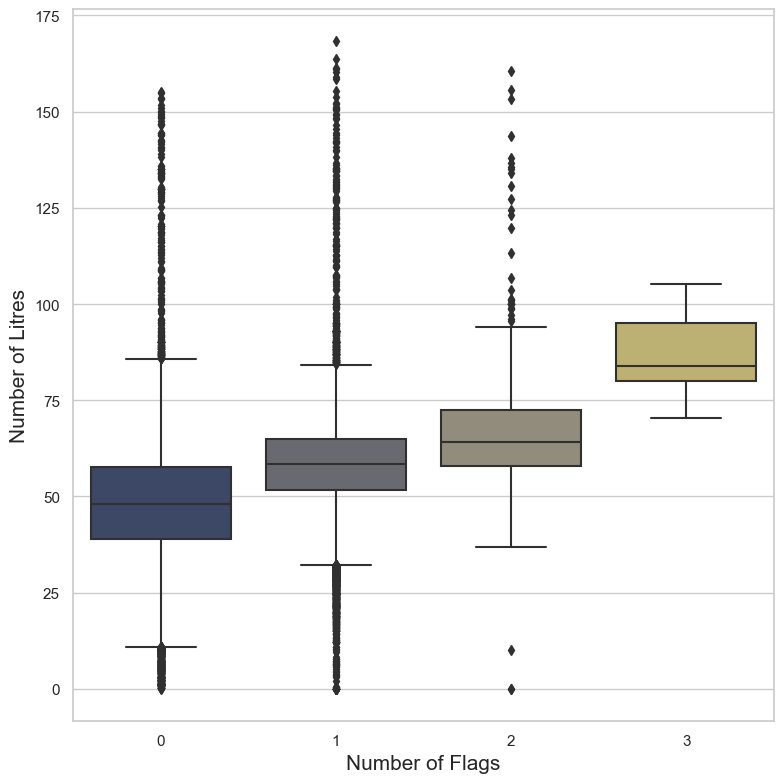

In [61]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 8)) 
sns.boxplot(x='Number_of_Flags', y='No. of Litres', data=data2, ax=ax, palette="cividis")

# Setting labels and titles
ax.set_ylabel('Number of Litres', fontsize=15) 
ax.set_xlabel('Number of Flags', fontsize=15)  
plt.tight_layout()

# Save the plot as a PDF file with high resolution
plt.savefig('../plots/heuristics/flag_litres.pdf', format='pdf', dpi=300)

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def shorten_names(names, max_length=20):
    shortened_names = []
    for name in names:
        if len(name) > max_length:
            shortened_names.append(name[:max_length] + '...')
        else:
            shortened_names.append(name)
    return shortened_names

def four_stacked_plots(data, categorical_vars, cluster_var, titles, filename, max_categories=8, max_length=20, color_theme='tab10'):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs = axs.ravel()

    for i, (cat_var, title) in enumerate(zip(categorical_vars, titles)):
        # Calculate the proportions of each category in each cluster
        cluster_proportions = data.groupby([cluster_var, cat_var]).size().unstack(fill_value=0)
        cluster_proportions = cluster_proportions.div(cluster_proportions.sum(axis=1), axis=0)

        # Get the top categories and group the rest into "Others"
        top_categories = cluster_proportions.sum().nlargest(max_categories).index
        cluster_proportions["Others"] = cluster_proportions.drop(columns=top_categories).sum(axis=1)
        cluster_proportions = cluster_proportions[top_categories.tolist() + ["Others"]]

        # Shorten the category names if necessary
        shortened_names = shorten_names(cluster_proportions.columns, max_length=max_length)

        # Get the specified color theme
        color_scheme = plt.cm.get_cmap(color_theme, len(cluster_proportions.columns))
        colors = color_scheme(range(len(cluster_proportions.columns)))

        # Create the stacked bar chart in the corresponding subplot
        cluster_proportions.plot(kind='bar', stacked=True, ax=axs[i], legend=False, color=colors)

        axs[i].set_xticklabels(cluster_proportions.index, rotation=0, fontsize=12)
        axs[i].set_xlabel('Number of flags', fontsize=14)
        axs[i].set_ylabel('Proportion', fontsize=14)
        axs[i].set_title(f"{chr(97+i)}) {title}")  # Prepend "a) ", "b) ", "c) ", "d) " to the titles

        # Create the legend for each subplot
        axs[i].legend(title='Categories', fontsize=10, labels=shortened_names, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.savefig(filename, format='pdf', bbox_inches='tight')
    plt.close(fig)

In [33]:
data.columns

Index(['Transaction Date', 'REG_NUM', 'Merchant Name', 'Purchase Category',
       'No. of Litres', 'Transaction Amount', 'Make', 'Model',
       'Make and Model', 'Site', 'District', 'Category', 'Rental',
       'Merchant Lat', 'Merchant Long', 'Site Lat', 'Site Long', 'Fuel Type',
       'Actual Fuel Price', 'Actual Fuel Price Inland',
       'Estimated Price Per Litre', 'Month Name', 'Weekday Name', 'YearMonth',
       'AggClusterLabels', 'TransKmeansCluster', 'Average_Category_Amount',
       'Transaction_Amount_Flag', 'Days_Between_Transactions',
       'Transaction_Frequency_Flag', 'Fuel_Price_Flag', 'Flag', 'Reason'],
      dtype='object')

In [67]:
# Change the data type of 'Number_of_Flags' to 'category' and order the categories
data['Number_of_Flags'] = data['Number_of_Flags'].astype('category')
data['Number_of_Flags'] = data['Number_of_Flags'].cat.reorder_categories([0, 1, 2, 3])
data['Number_of_Flags'] = data['Number_of_Flags'].cat.as_ordered()

In [71]:
four_stacked_plots(data,
                   ['MODEL DERIVATIVE', 'DEPARTMENT', 'District', 'RATE CARD CATEGORY'],
                   'Number_of_Flags',
                   ['Model Derivative', 'Department', 'District', 'Rate Card Category'],
                   '../plots/heuristics/heuristics_categorical.pdf',
                   max_categories=7, max_length=15)

/var/folders/v7/l0jq1cbd0fnf4ytmwzksxt0r0000gn/T/ipykernel_3015/1395826412.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_scheme = plt.cm.get_cmap(color_theme, len(cluster_proportions.columns))
/var/folders/v7/l0jq1cbd0fnf4ytmwzksxt0r0000gn/T/ipykernel_3015/1395826412.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_scheme = plt.cm.get_cmap(color_theme, len(cluster_proportions.columns))
/var/folders/v7/l0jq1cbd0fnf4ytmwzksxt0r0000gn/T/ipykernel_3015/1395826412.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[na